### Диагностика и кривые обучения

#### Цель работы

Познакомиться на практике с явлениями недо и переобучения, научиться их выявлять путем диагностики, составлять и применять рекомендации по улучшению эффективности систем машинного обучения

#### Задания для выполнения

1. Загрузите датасет breast_cancer.
2. Выберите два первых признака. Таким образом мы уменьшим размерность задачи. У нас была задача множественной классификации, а стала - бинарная.
3. Разделите датасет на обучающую и тестовую выборки в пропорции 80-20.
4. Постройте классификатор на опорных векторах с гауссовым ядром с параметром регуляризации C=0.01. Выведите на экран значение точности на тестовой и обучающей выборке. Сделайте предварительный вывод о степени обученности модели.
5. Постройте графически зависимость тестовой и обучающей точности от размера обучающей выборки. Прокомментируйте получившийся результат. Сделайте вывод о том, недообучается или переобучается модель? В зависимости от этого выберите варианты, которые могут привести к увеличению точности модели (обычно подходит больше одного варианта):
    1. собрать больше объектов наблюдения;
    2. провести обучение на меньшем объеме данных;
    3. исключить часть признаков из модели;
    4. добавить новые признаки в модель;
    5. добавить полиномиальные признаки;
    6. попробовать более сложные модели;
    7. попробовать более простые модели;
    8. увеличить регуляризацию модели;
    9. уменьшить регуляризацию модели;
6. Проверьте выдвинутую гипотезу и попробуйте улучшить модель в соответствии с выбранными рекомендациями. Проверьте, увеличивается ли тестовая точность. Сделайте вывод.
7. Повторите предыдущий пункт для различных значений C в диапазоне от 0,0001 до 1 000 000. Обратите внимание на шкалу по вертикальной оси. Для каких значений тестовая точность оптимальна? Какие значения дают недообучение? Какие - переобучение?
8. Постройте график зависимости тестовой и обучающей точности от значения регуляризационного параметра. Сделайте вывод о зависимости степени регуляризации на точность модели.
9. Найдите методом подбора оптимальное значение параметра регуляризации (примерное).
10. Повторите два предыдущих пункта для метода опорных векторов с линейным ядром. Сравните получившиеся результаты. Сделайте вывод о сравнительной эффективности двух этих моделей.

#### Методические указания

Для начала работы нам потребуется импортировать необходимые библиотеки:

```py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
```

В первую очередь загрузим датасет, выберем нужные данные и выделим тестовую выборку для оценки точности модели:

```py
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
X_2d = X[:, :2]
X_train, X_test, y_train, y_test = train_test_split(X_2d, y)
```

Затем построим первый классификатор. Оценка его точности даст нам приблизительную оценку уровня общей эффективности простых неоптимизированных моделей:

```py
clf = SVC(C=0.01)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
```

Сами по себе данные значения мало о чем могут нам сказать. Понятно, что хотелось бы получить как можно более высокие значения. Но скорее всего вы не получите идеальную классификацию, а оценка точности будет лежать в пределах от 0 до 1. Для разных задач разная точность может считаться приемлемой. Для того, чтобы понять, можно ли повысить точность усовершенствованием модели нужно понять, какова степень обученности данной модели. Какую-то информацию может нам дать разница между этими значениями.

Если тестовая точность близка к обучающей, это скорее всего означает, что модель недообучается и при использовании более сложных моделей (или при снижении регуляризации, что эффективно то же самое) есть надежда улучшить данный показатель.

Если тестовая точность значительно ниже обучающей, это свидетельствует о потенциальном переобучении и потере способности к переобучению. Тогда для совершенствования модели нужно действовать в обратном направлении: использовать более простые модели или увеличивать регуляризацию данной.

Если же тестовая точность выше обучающей, это говорит о наличии случайных ошибок выборки тестовой модели. Такие ошибки неизбежно присутствуют и могут зашумлять результаты диагностики. Поэтому чаще всего для таких работ производится перекрестная проверка, которую мы будем проходить позже.

Для более точного анализа попробуем выяснить, что происходит с точностью при обучении на части обучающей выборки в зависимости от количества используемых точек. Для этого организуем обучение в цикле (обратите внимание на использование функции linspace):

```py
training_scores = []
test_scores = []
numbers = []

for i in np.linspace(20, len(X_train), 20):
    clf = SVC(C=10, kernel='rbf')
    X = X_train[:int(i)]
    y = y_train[:int(i)]
    clf.fit(X, y)
    numbers.append(int(i))
    training_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
plt.legend(loc="best")
```

Проанализировав получившийся график мы может понять более подробную картину. В частности можно видеть, что с ростом объема обучающей выборки точность на ней растет монотонно, а вот точность на тестовой резко возрастает, а затем начинает снижаться. 

При анализе таких графиков следует понимать, что на реальных данных всегда будут присутствовать случайные отклонения, что приводит к зашумленности графиков. Это означает, что нужно обращать внимание на общую тенденцию, а мелкие вариации скорее всего не несут никакой полезной информации. Причем, чем меньше выборка в целом, тем больше будет вклад случайных факторов. Поэтому, в общем случае, увеличение объема данных приводит и к более точным моделям и облегчает их анализ.

Для лучшей читаемости результатов рекомендуется зафиксировать минимальное и максимальное значение по вертикальной оси, чтобы все графики, построенные в рамках данной работы были сопоставимы. Например, можно строить все графики в диапазоне y от 0,8 до 1,0.

#### Контрольные вопросы

1. Как влияет параметр С на степень регуляризации моделей классификации?
2. Что показывает соотношение точности (ошибки) на тестовой и обучающей выборке?
3. Чем характеризуется ситуация недообучения? Как ее распознать на кривых обучения? А переобучение?
4. Каковы рекомендации по улучшению точности модели в случае недообучения? А переобучения?
5. Какова вычислительная сложность подбора гиперпараметров модели?

#### Дополнительные задания

1. Повторите такой же анализ для полиномиального ядра и степени полинома как гиперпараметра. Прокомментируйте кривые обучения для случаев недо-и переобучения.
2. Исследуйте зависимость степени обученности модели от значения других гиперпараметров различных классификаторов, реализованных в sklearn. Постройте кривые обучения в зависимости от значения этих параметров.
3. Повторите данное исследование на полном датасете. Сделайте выводы об оптимальной регуляризации моделей.
4. Повторите данное исследование на другом датасете. Предпочтительно выбирать более объемный набор данных для классификации (несколько тысяч примеров на каждый класс).
5. Напишите функцию, которая автоматизирует процесс подбора гиперпараметров данной модели путем проверки ошибок на тестовой выборке моделей с разными значениями гиперпараметра. Сравните вашу реализацию с функцией GridSearch. 


#### Задания для выполнения



1. Загрузите датасет breast_cancer.


In [13]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

In [14]:
X.shape # 30 признаков

(569, 30)

2. Выберите два первых признака. Таким образом мы уменьшим размерность задачи. У нас была задача множественной классификации, а стала - бинарная.


In [15]:
X_bin = X[:, :2]

3. Разделите датасет на обучающую и тестовую выборки в пропорции 80-20.


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_bin, y, test_size = 0.2, random_state = 11)

4. Постройте классификатор на опорных векторах с гауссовым ядром с параметром регуляризации C=0.01. Выведите на экран значение точности на тестовой и обучающей выборке. Сделайте предварительный вывод о степени обученности модели.


In [17]:
from sklearn.svm import SVC

clf = SVC(C=0.01)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.6989010989010989
0.7631578947368421


5. Постройте графически зависимость тестовой и обучающей точности от размера обучающей выборки. Прокомментируйте получившийся результат. Сделайте вывод о том, недообучается или переобучается модель? В зависимости от этого выберите варианты, которые могут привести к увеличению точности модели (обычно подходит больше одного варианта):
    1. собрать больше объектов наблюдения;
    2. провести обучение на меньшем объеме данных;
    3. исключить часть признаков из модели;
    4. добавить новые признаки в модель;
    5. добавить полиномиальные признаки;
    6. попробовать более сложные модели;
    7. попробовать более простые модели;
    8. увеличить регуляризацию модели;
    9. уменьшить регуляризацию модели;


In [18]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [19]:
def train_size_adict(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, C=10):
    training_scores = []
    test_scores = []
    numbers = []

    for i in np.linspace(20, len(X_train), 20):
        clf = SVC(C=C, kernel='rbf')
        X = X_train[:int(i)]
        y = y_train[:int(i)]
        clf.fit(X, y)
        numbers.append(int(i))
        training_scores.append(clf.score(X_train, y_train))
        test_scores.append(clf.score(X_test, y_test))
    plt.figure(figsize=(10, 5))
    plt.ylim([0.8, 1])
    plt.plot(numbers, training_scores, label="training scores")
    plt.plot(numbers, test_scores, label="test scores")
    plt.legend(loc="best")

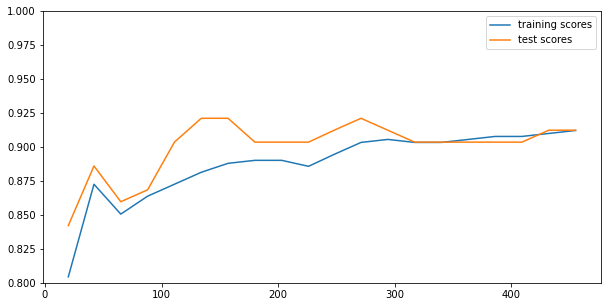

In [20]:
train_size_adict()

Если test scores ниже, чем train scores, то модель переобучена. На графике видно, что test и train находятся на одном уровне, поэтому переобучения нет

Можно предположить, что при увеличении выборки увеличится точность, а также, если немного уменьшить параметр регуляризации, можно попробовать добавить признаков

6. Проверьте выдвинутую гипотезу и попробуйте улучшить модель в соответствии с выбранными рекомендациями. Проверьте, увеличивается ли тестовая точность. Сделайте вывод.


In [21]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.2, random_state = 12)

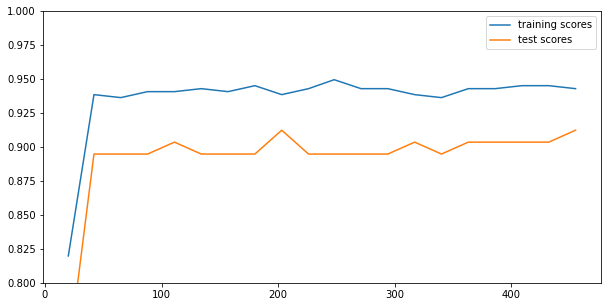

In [22]:
train_size_adict(X_train2, X_test2, y_train2, y_test2, 100)

тестовая точность слегка уменьшилась и модель значительно больше переобучена

7. Повторите предыдущий пункт для различных значений C в диапазоне от 0,0001 до 1 000 000. Обратите внимание на шкалу по вертикальной оси. Для каких значений тестовая точность оптимальна? Какие значения дают недообучение? Какие - переобучение?



In [23]:
def C_selection(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, kernel='rbf'):
    training_scores = []
    test_scores = []
    C = []
    for i in np.arange(-4,7):
        clf = SVC(C=10.0**i, kernel='rbf')
        clf.fit(X_train, y_train)
        C.append(10.0**i)
        training_scores.append(clf.score(X_train, y_train))
        test_scores.append(clf.score(X_test, y_test))
    plt.figure(figsize=(10, 5))
    plt.ylim([0.8, 1])
    plt.plot(C, training_scores, label="training scores")
    plt.plot(C, test_scores, label="test scores")
    plt.xscale("log")
    plt.grid()
    plt.legend(loc="best");

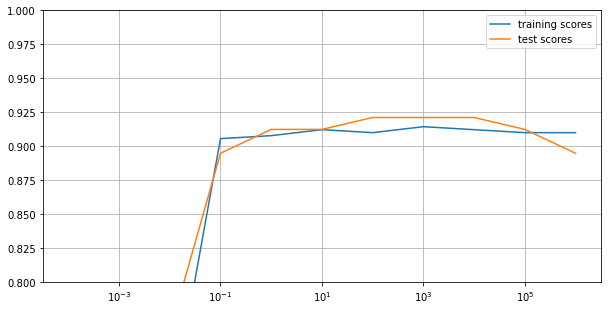

In [24]:
C_selection()

8. Постройте график зависимости тестовой и обучающей точности от значения регуляризационного параметра. Сделайте вывод о зависимости степени регуляризации на точность модели.


начиная от 10 тестовая точность почти не меняется, до 0.1 модель показывает себя не очень. С ростом C растет тренировочная точность

9. Найдите методом подбора оптимальное значение параметра регуляризации (примерное).


оптимальное примерно 0.1 или 10^-1

10. Повторите два предыдущих пункта для метода опорных векторов с линейным ядром. Сравните получившиеся результаты. Сделайте вывод о сравнительной эффективности двух этих моделей.

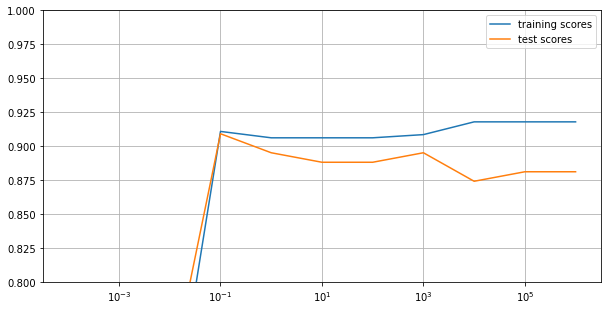

In [14]:
C_selection(kernel='linear')

По графикам можно сказать, что параметр регуляризации влияет одинаково в обоих случаях. Лучше всего подходит 0.1. Но вторая модель слегка больше переобучается, чем первая

#### Дополнительные задания



In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from yellowbrick.model_selection import LearningCurve
from sklearn.model_selection import GridSearchCV

1. Повторите такой же анализ для полиномиального ядра и степени полинома как гиперпараметра. Прокомментируйте кривые обучения для случаев недо-и переобучения.


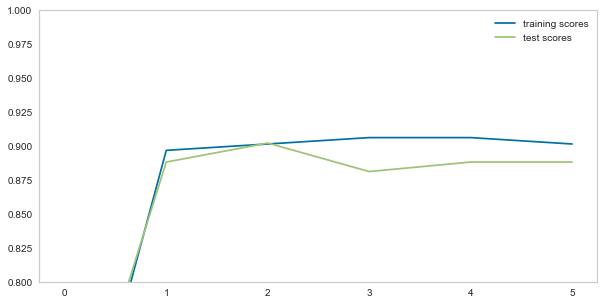

In [16]:
training_scores = []
test_scores = []
degrees = []
for deg in np.arange(6):
    clf = SVC(kernel='poly', degree=deg)
    clf.fit(X_train, y_train)
    degrees.append(deg)
    training_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))
plt.figure(figsize=(10, 5))
plt.ylim([0.8, 1])
plt.plot(degrees, training_scores, label="training scores")
plt.plot(degrees, test_scores, label="test scores")
plt.grid()
plt.legend(loc="best");

На графике видно легкую переобученность модели

2. Исследуйте зависимость степени обученности модели от значения других гиперпараметров различных классификаторов, реализованных в sklearn. Постройте кривые обучения в зависимости от значения этих параметров.


D:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


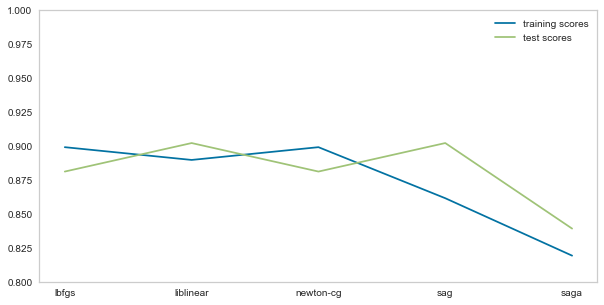

In [17]:
training_scores = []
test_scores = []
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
for solver in solvers:
    clf = LogisticRegression(solver=solver)
    clf.fit(X_train, y_train)
    training_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))
plt.figure(figsize=(10, 5))
plt.ylim([0.8, 1])
plt.plot(solvers, training_scores, label="training scores")
plt.plot(solvers, test_scores, label="test scores")
plt.grid()
plt.legend(loc="best");

На "гистограмме" видно, что наилучшие показатели качества демонтрирует liblinear, а наихудшие saga. 

3. Повторите данное исследование на полном датасете. Сделайте выводы об оптимальной регуляризации моделей.


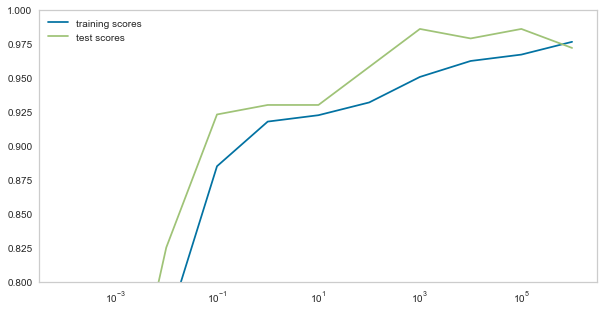

In [18]:
C_selection(X_train=X_train2, X_test=X_test2, y_train=y_train2, y_test=y_test2, kernel='rbf')

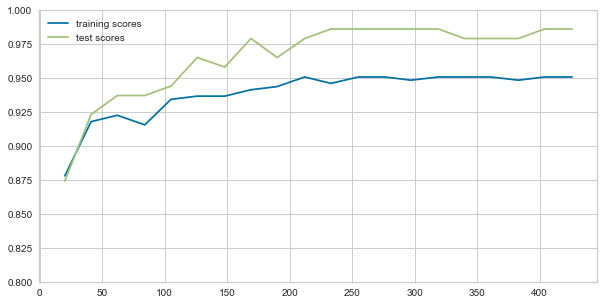

In [19]:
train_size_adict(X_train2, X_test2, y_train2, y_test2, 1000)

С увеличением параметра регуляризации растет и качество модели

4. Повторите данное исследование на другом датасете. Предпочтительно выбирать более объемный набор данных для классификации (несколько тысяч примеров на каждый класс).


In [20]:
from sklearn.datasets import fetch_covtype

forest = fetch_covtype()

In [21]:
data_05, _, target_05, _ = train_test_split(forest.data, forest.target, train_size=0.007)

In [22]:
data_05.shape

(4067, 54)

In [23]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(data_05, target_05)

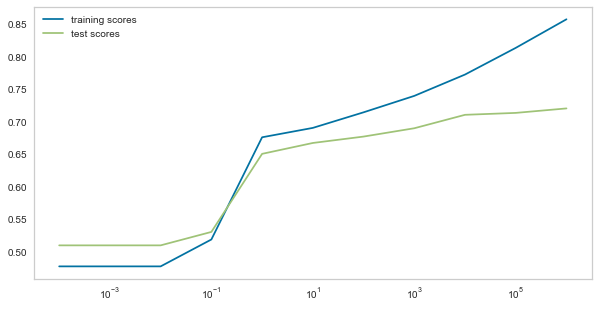

In [24]:
training_scores = []
test_scores = []
C = []
for i in np.arange(-4,7):
    clf = SVC(C=10.0**i, kernel='rbf')
    clf.fit(X_train3, y_train3)
    C.append(10.0**i)
    training_scores.append(clf.score(X_train3, y_train3))
    test_scores.append(clf.score(X_test3, y_test3))
    
plt.figure(figsize=(10, 5))
plt.plot(C, training_scores, label="training scores")
plt.plot(C, test_scores, label="test scores")
plt.xscale("log")
plt.grid()
plt.legend(loc="best");

С увеличением параметра регуляризации растет и качество модели

5. Напишите функцию, которая автоматизирует процесс подбора гиперпараметров данной модели путем проверки ошибок на тестовой выборке моделей с разными значениями гиперпараметра. Сравните вашу реализацию с функцией GridSearch. 


In [27]:
def hyper_selection(x_train, x_test, y_train, y_test):
    Cs = 10.0**np.arange(-4,7)
    gammas = 10.0**np.arange(-4,7)
    best_gamma = gest_C = None
    score = 0
    for C in Cs:
        for gamma in gammas:
            clf = SVC(C=C, kernel='rbf', gamma=gamma)
            clf.fit(x_train, y_train)
            temp = clf.score(x_test, y_test)
            if (temp>score):
                best_gamma = gamma
                best_C = C
                score = temp
    return best_gamma, best_C

In [28]:
hyper_selection(X_train3, X_test3, y_train3, y_test3)

(0.0001, 10.0)

#### сравние с GridSearch

In [29]:
example = GridSearchCV(SVC(kernel='rbf'), {'C':10.0**np.arange(-4,7), 'gamma':10.0**np.arange(-4,7)})

In [30]:
example.fit(data_05, target_05)

GridSearchCV(estimator=SVC(),
             param_grid={'C': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04, 1.e+05, 1.e+06]),
                         'gamma': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04, 1.e+05, 1.e+06])})

In [32]:
exmple.best_params_

{'C': 10.0, 'gamma': 0.0001}

Собственная функция идентична функции из библиотеки